This notebook crops out the center 10% (can be changed) of an image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

from PIL import Image

import os

c:\Users\yjiah\Downloads\Synapxe-Tongue-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("e1010101/tongue-images-384")

c:\Users\yjiah\Downloads\Synapxe-Tongue-Project\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yjiah\.cache\huggingface\hub\datasets--e1010101--tongue-images-384. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 106/106 [00:01<00:00, 85.84 examples/s]


In [4]:
def crop_center_10_percent(image):
    image_array = np.array(image)
    height, width = image_array.shape[:2]
    
    crop_height = int(height * 0.1)
    crop_width = int(width * 0.1)
    
    start_y = (height - crop_height) // 2
    start_x = (width - crop_width) // 2
    
    cropped_image_array = image_array[start_y:start_y+crop_height, start_x:start_x+crop_width]
    cropped_image = Image.fromarray(cropped_image_array)
    
    return cropped_image

In [5]:
def crop_dataset(dataset):
    cropped_dataset = dataset.map(lambda example: {'image': crop_center_10_percent(example['image'])})
    return cropped_dataset

In [6]:
cropped_train = crop_dataset(dataset['train'])
cropped_valid = crop_dataset(dataset['validation'])
cropped_test = crop_dataset(dataset['test'])

Map: 100%|██████████| 106/106 [00:01<00:00, 72.82 examples/s]


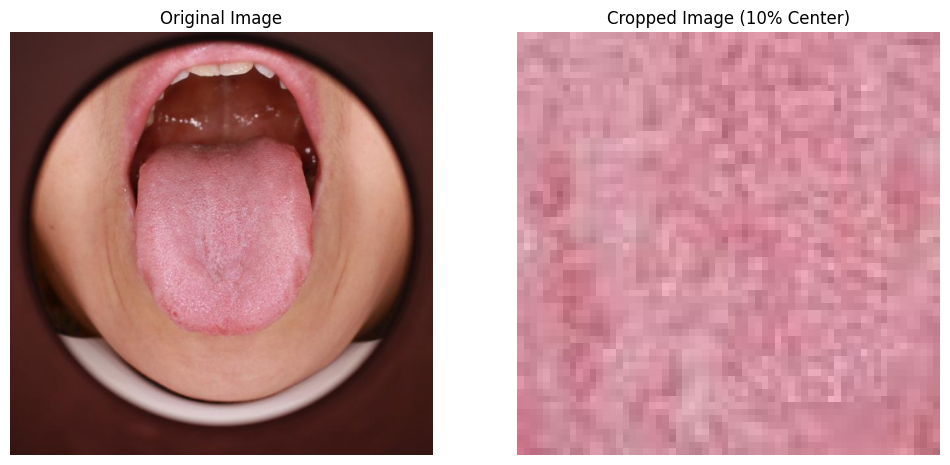

In [7]:
sample_index = 0
original_image = dataset['train'][sample_index]['image']
cropped_image = cropped_train[sample_index]['image']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(cropped_image)
ax2.set_title('Cropped Image (10% Center)')
ax2.axis('off')
plt.show()

In [ ]:
# Optional; save dataset to local
def save_dataset(dataset, split_name, output_dir):
    split_dir = os.path.join(output_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)
    
    for idx, example in enumerate(dataset):
        image = example['image']
        image_path = os.path.join(split_dir, f"{split_name}_{idx:05d}.png")
        image.save(image_path)

output_dir = "dataset_cropped"
save_dataset(cropped_train, "train", output_dir)
save_dataset(cropped_valid, "valid", output_dir)
save_dataset(cropped_test, "test", output_dir)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000194CF48D700>>
Traceback (most recent call last):
  File "c:\Users\yjiah\Downloads\Synapxe-Tongue-Project\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yjiah\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1534, in enumerate
    def enumerate():
    
KeyboardInterrupt: 
